In [190]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.impute import KNNImputer

leg = pd.read_csv('2014UTASP20150910.csv',encoding='cp932')
vot = pd.read_csv('2014_2016UTASV20161004.csv',encoding='cp932')

leg['party'] = leg['PARTY'].replace(np.arange(1,14),['LDP','DPJ','JRP','Komeito','Oth','JCP','Oth','SDP','Oth','Oth','Oth','Oth','Oth'])
vot['party'] = vot['W1Q18_1'].replace([1,2,3,4,5,6,7,8,9,11,99],['LDP','DPJ','JRP','Komeito',np.nan,'JCP',np.nan,'SDP',np.nan,'None',np.nan])

qs_leg = ['Q7_{}'.format(i) for i in np.arange(1,11,1)]
qs_vot = ['W1Q17_{}'.format(i) for i in np.arange(1,11,1)]

for i in qs_leg:
    leg[i].replace(99,np.nan,inplace=True)
    
for i in qs_vot:
    vot[i].replace(99,np.nan,inplace=True)

df = pd.DataFrame(columns=['Q{}'.format(i) for i in np.arange(1,11,1)]+['type','party','wt'],index=range(len(leg)+len(vot)))

#df.loc[0:len(leg)-1,:10] = KNNImputer().fit_transform(leg[qs_leg])
df.loc[0:len(leg)-1,:10] = leg[qs_leg].fillna(3).values
df.loc[0:len(leg)-1,'type'] = 'legislator'
df.loc[9:len(leg)-1,'party'] = leg['party']
#df.loc[len(leg):len(leg)+len(vot)-1,:10] = KNNImputer().fit_transform(vot[qs_vot])
df.loc[len(leg):len(leg)+len(vot)-1,:10] = vot[qs_vot].fillna(3).values
df.loc[len(leg):len(leg)+len(vot)-1,'type'] = 'electorate'
df.loc[len(leg):len(leg)+len(vot)-1,'party'] = vot['party']
df['wt'] = 1

df['party'] = df['party'].astype('category').cat.reorder_categories(['LDP','DPJ','Komeito','JCP','JRP','SDP','Oth','None'])

df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,type,party,wt
0,3,2,3,3,3,4,4,4,3,3,legislator,NaN,1
1,3,5,2,1,4,1,4,4,2,4,legislator,NaN,1
2,5,4,1,2,4,1,5,4,1,4,legislator,NaN,1
3,1,4,5,2,5,2,5,4,1,1,legislator,NaN,1
4,3,3,3,3,1,4,3,4,3,3,legislator,NaN,1


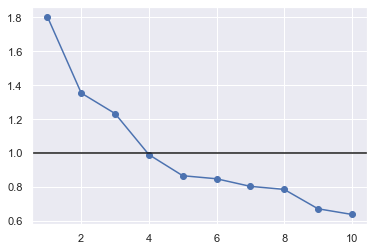

In [187]:
from factor_analyzer import FactorAnalyzer as fa

questions = ['Q{}'.format(i) for i in np.arange(1,11,1)]

mod = fa(rotation=None).fit(df.loc[df['type']=='electorate',questions])

eigen = mod.get_eigenvalues()[0]

plt.plot(np.arange(1,11),eigen,marker='o')
plt.axhline(1,color='k')

In [188]:
res = fa(rotation='promax',n_factors=3).fit(df.loc[df['type']=='electorate',questions])

for i in np.arange(1,4):
    df['factor{}'.format(i)] = res.transform(df[questions])[:,i-1]
    
df[['factor{}'.format(i) for i in np.arange(1,4)]].corr()

,factor1,factor2,factor3
factor1,1.000000,-0.420413,-0.005578
factor2,-0.420413,1.000000,-0.066962
factor3,-0.005578,-0.066962,1.000000


Text(0.5, 1.0, 'Electorate')

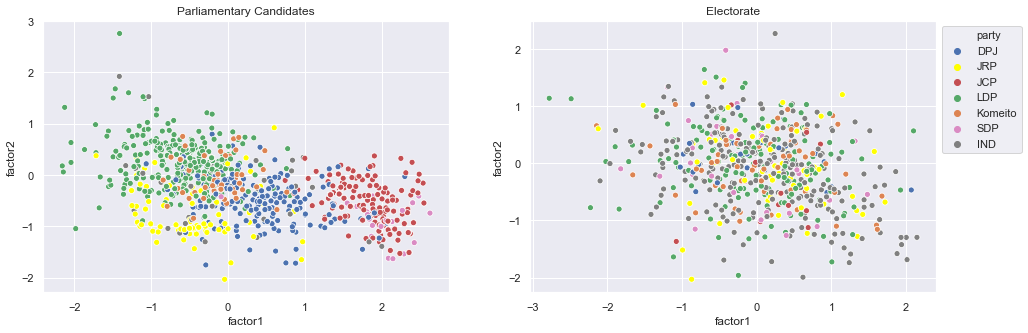

In [189]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x='factor1',y='factor2',hue='party',data=df.loc[df['type']=='legislator'],ax=ax[0],palette=['C0','yellow','C3','C2','C1','C6','grey'])
ax[0].legend(loc='upper left',bbox_to_anchor=(2.2,1))
ax[0].set_title('Parliamentary Candidates')
sns.scatterplot(x='factor1',y='factor2',hue='party',data=df.loc[df['type']=='electorate'],ax=ax[1],palette=['grey','yellow','C2','C1','C3','C0','C6'],legend=False)
ax[1].set_title('Electorate')

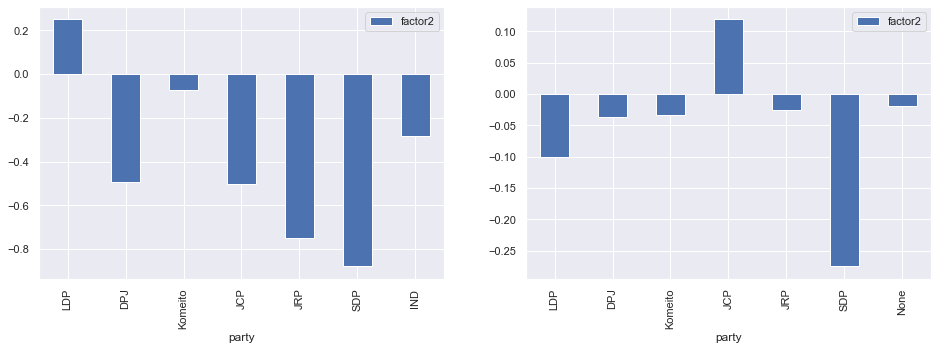

In [182]:
table = pd.pivot_table(df,index=['type','party'],values=['factor2'])

fig, ax = plt.subplots(1,2,figsize=(16,5))

table.loc['legislator'].plot.bar(ax=ax[0])
table.loc['electorate'].plot.bar(ax=ax[1])

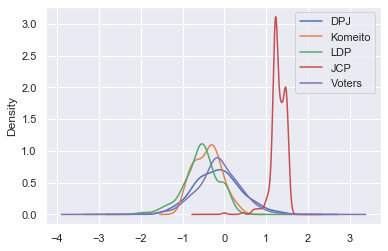

In [168]:
df.loc[(df['type']=='legislator')&(df['party']=='DPJ'),'factor1'].plot.kde(label='DPJ')
df.loc[(df['type']=='legislator')&(df['party']=='Komeito'),'factor1'].plot.kde(label='Komeito')
df.loc[(df['type']=='legislator')&(df['party']=='LDP'),'factor1'].plot.kde(label='LDP')
df.loc[(df['type']=='legislator')&(df['party']=='JCP'),'factor1'].plot.kde(label='JCP')
df.loc[(df['type']=='electorate'),'factor1'].plot.kde(label='Voters')
plt.legend()

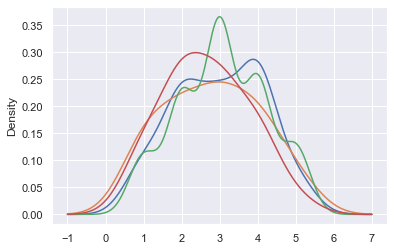

In [184]:
df.loc[(df['type']=='electorate')&(df['party']=='DPJ'),'Q1'].plot.kde()
df.loc[(df['type']=='electorate')&(df['party']=='Komeito'),'Q1'].plot.kde()
df.loc[(df['type']=='electorate')&(df['party']=='LDP'),'Q1'].plot.kde()
df.loc[(df['type']=='electorate')&(df['party']=='JCP'),'Q1'].plot.kde()

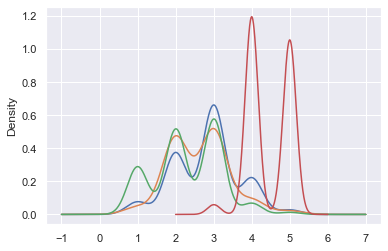

In [185]:
df.loc[(df['type']=='legislator')&(df['party']=='DPJ'),'Q1'].plot.kde()
df.loc[(df['type']=='legislator')&(df['party']=='Komeito'),'Q1'].plot.kde()
df.loc[(df['type']=='legislator')&(df['party']=='LDP'),'Q1'].plot.kde()
df.loc[(df['type']=='legislator')&(df['party']=='JCP'),'Q1'].plot.kde()